# Percobaan 2

logistic regression untuk multiclass classification. 

<Figure size 640x480 with 0 Axes>

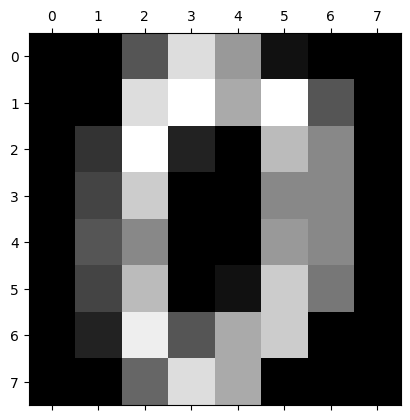

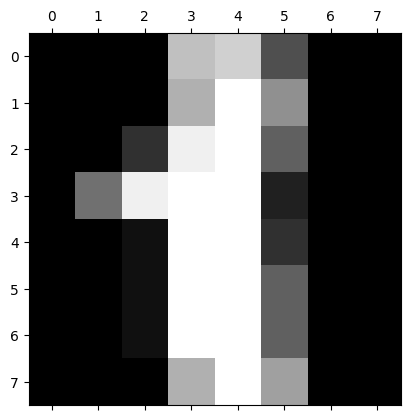

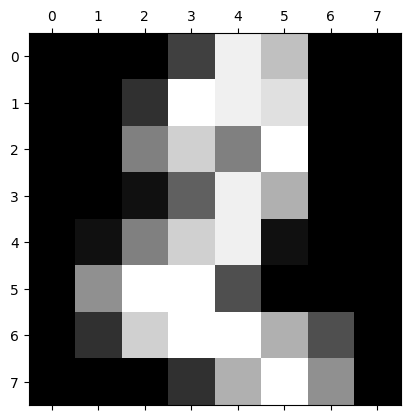

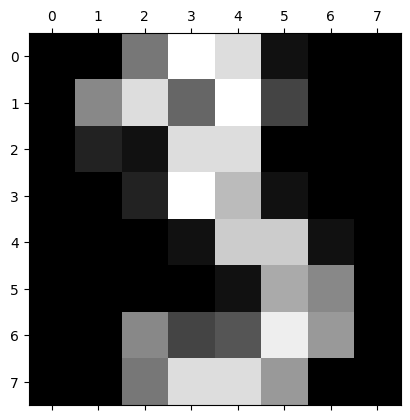

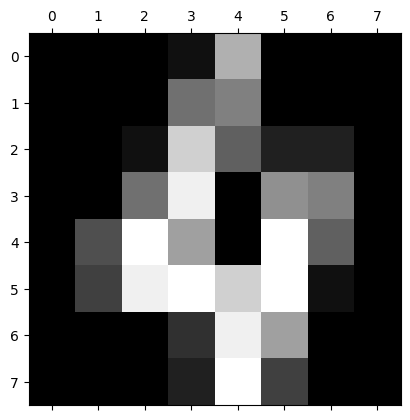

In [7]:
from sklearn.datasets import load_digits
%matplotlib inline
import matplotlib.pyplot as plt
digits = load_digits()

plt.gray() 
for i in range(5):
    plt.matshow(digits.images[i]) 

<div style="border-radius: 10px; border: #0ea5e9 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b>🖊️ Analisis :</b> Menampilkan dataset mnist dari library sklearn mengatur mode warna menjadi grayscale, lalu menampilkannya dalam loop dari digit 0 hingga 4.
</div>

In [8]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [9]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

### Menerapkan logistic regression model

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size=0.2)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [21]:
model.fit(X_train, y_train)

c:\Users\M S I\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

<div style="border-radius: 10px; border: #0ea5e9 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b>🖊️ Analisis :</b> Membagi data menjadi train dan test, lalu menerapkan model logistic regresi
</div>

### Mengukur akurasi model

In [12]:
model.score(X_test, y_test)

0.9611111111111111

In [13]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

<div style="border-radius: 10px; border: #0ea5e9 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b>🖊️ Analisis :</b> Kode model.score(X_test, y_test) digunakan untuk menghitung akurasi model regresi logistik pada data pengujian. Akurasi adalah rasio antara jumlah prediksi yang benar dan total jumlah prediksi. Dalam hal ini, model Anda menghasilkan akurasi sebesar 0.96111 atau 96.111% pada data pengujian.

Nilai ini cukup tinggi, yang menunjukkan bahwa model Anda melakukan pekerjaan yang baik dalam memprediksi label kelas yang benar untuk data pengujian. Dengan kata lain, model Anda benar dalam sekitar 96.111% kasus pada data pengujian.
</div>

### Classification_report

In [14]:
y_predicted = model.predict(X_test)

In [15]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        27
           1       0.84      0.97      0.90        33
           2       0.97      1.00      0.99        33
           3       0.97      1.00      0.99        35
           4       0.98      0.95      0.97        44
           5       0.95      0.95      0.95        40
           6       0.96      0.96      0.96        28
           7       1.00      1.00      1.00        43
           8       1.00      0.84      0.91        38
           9       0.95      0.97      0.96        39

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



### Confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[26,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 32,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 35,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0, 42,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  1,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 27,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 43,  0,  0],
       [ 0,  3,  1,  0,  0,  1,  0,  0, 32,  1],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  0, 38]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

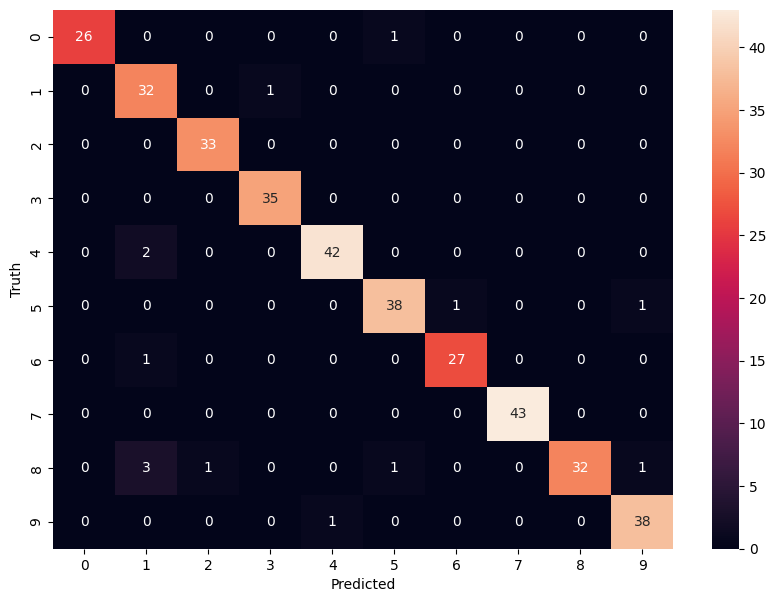

In [17]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')